### Importing required libraries

In [2]:
import pandas as pd
import textblob
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

### Exploring our given Dataset

In [3]:
df = pd.read_csv('dataset.csv', encoding='latin1')

In [4]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave..."
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo..."


### The column 'review' can be used to get insights about customers sentiments 

In [5]:
df['review']

0       I'm not a huge mcds lover, but I've been to be...
1       Terrible customer service. Î¾I came in at 9:30...
2       First they "lost" my order, actually they gave...
3       I see I'm not the only one giving 1 star. Only...
4       Well, it's McDonald's, so you know what the fo...
                              ...                        
1520    I enjoyed the part where I repeatedly asked if...
1521    Worst McDonalds I've been in in a long time! D...
1522    When I am really craving for McDonald's, this ...
1523    Two points right out of the gate: 1. Thuggery ...
1524    I wanted to grab breakfast one morning before ...
Name: review, Length: 1525, dtype: object

### Checking for any missing, empty or na values in column 'review'

In [6]:
missing_values_of_review = df['review'].isnull().sum()
print("Number of missing values:", missing_values_of_review)
empty_values_of_review = (df['review'] == '').sum()
print("Number of empty values:", empty_values_of_review)
na_values_of_review= (df['review']=='na').sum()
print("Number of na values:", na_values_of_review)

Number of missing values: 0
Number of empty values: 0
Number of na values: 0


### Checking for any missing, empty or na values in column 'policies_violated'

In [13]:
missing_values_of_policies_violated = df['policies_violated'].isnull().sum()
print("Number of missing values:", missing_values_of_policies_violated)
empty_values_of_policies_violated = (df['policies_violated'] == '').sum()
print("Number of empty values:", empty_values_of_policies_violated)
na_values_of_policies_violated= (df['policies_violated']=='na').sum()
print("Number of na values:", na_values_of_policies_violated)

Number of missing values: 0
Number of empty values: 0
Number of na values: 0


### Removing them

In [12]:
df.dropna(subset=['policies_violated'], inplace=True) 
df = df[df['policies_violated'] != 'na']

In [14]:
df['policies_violated']

0       RudeService\rOrderProblem\rFilthy
1                             RudeService
2               SlowService\rOrderProblem
4                             RudeService
5                    BadFood\rSlowService
                      ...                
1520                         OrderProblem
1521         SlowService\rFilthy\rBadFood
1522                            ScaryMcDs
1523                            ScaryMcDs
1524               ScaryMcDs\rSlowService
Name: policies_violated, Length: 1176, dtype: object

In [15]:
from textblob import TextBlob

def getsubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getpolarity(review):
    return TextBlob(review).sentiment.polarity

# New columns Subjectivity and Polarity using user defined function and apply method

df['Subjectivity'] = df['review'].apply(getsubjectivity)
df['Polarity'] = df['review'].apply(getpolarity)

In [16]:
def getanalysis(score):
    if score < 0 :
        return "Negative"
    elif score == 0 :
        return "Neutral"
    else :
        return "Positive"

df['Analysis'] = df['Polarity'].apply(getanalysis)

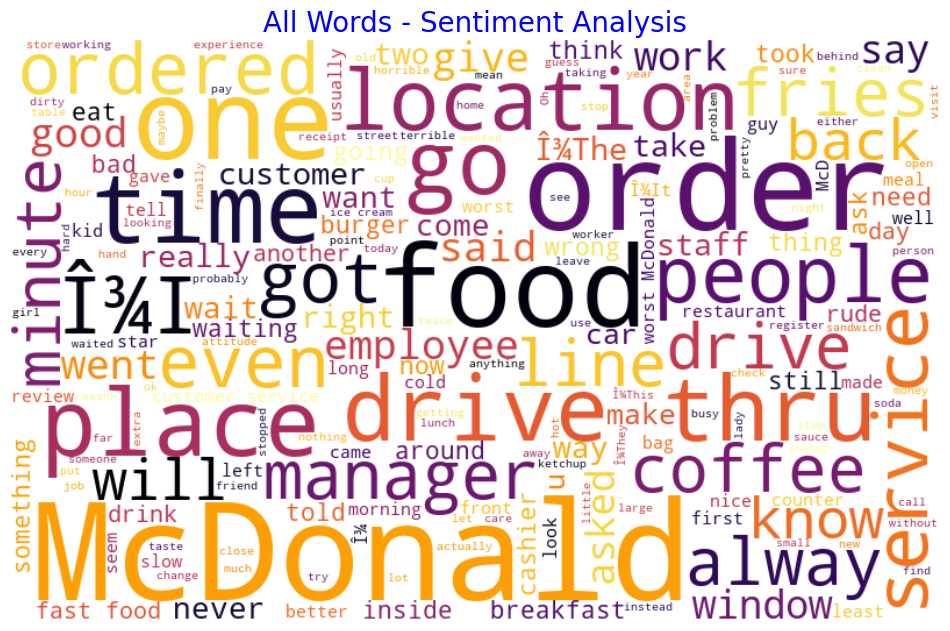

In [17]:
allwords = ' '.join([review for review in df['review']])

wordcloud = WordCloud(
    width=800,
    height=500,
    background_color='white',  
    colormap='inferno', 
    random_state=20,
    max_font_size=119
).generate(allwords)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("All Words - Sentiment Analysis", fontsize=20, color='blue')
plt.axis('off')
plt.show()

In [18]:
negative_table = df[df["Analysis"]=="Negative"]
positive_table = df[df["Analysis"]=="Positive"]
neutral_table = df[df["Analysis"]=="Neutral"]

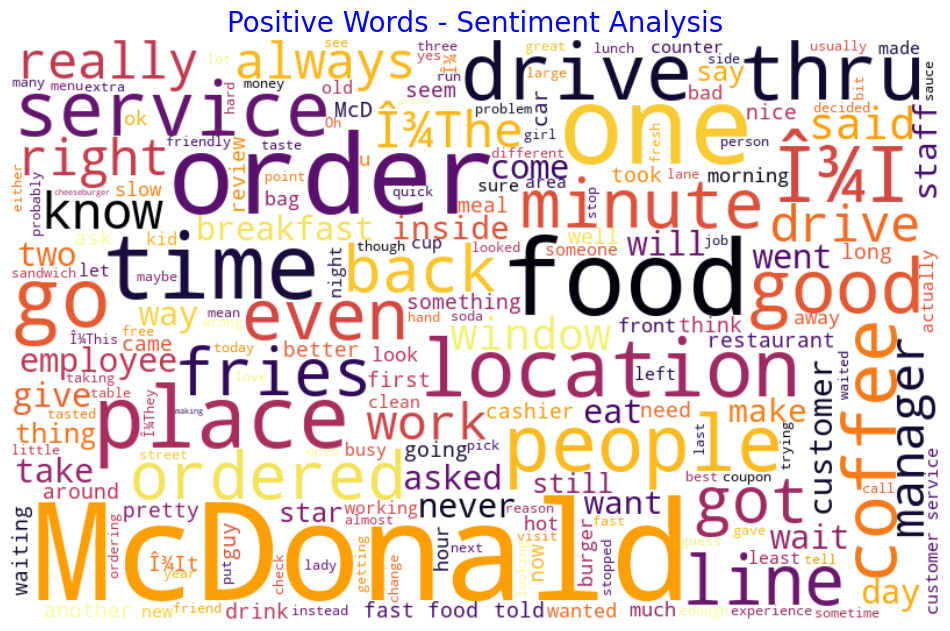

In [19]:
positivewords = ' '.join([review for review in positive_table['review']])
wordcloud = WordCloud(width=800,
    height=500,
    background_color='white',  
    colormap='inferno', 
    random_state=20,
    max_font_size=119).generate(positivewords)


plt.figure(figsize = (12,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.title("Positive Words - Sentiment Analysis", fontsize=20, color='blue')
plt.axis('off')
plt.show()

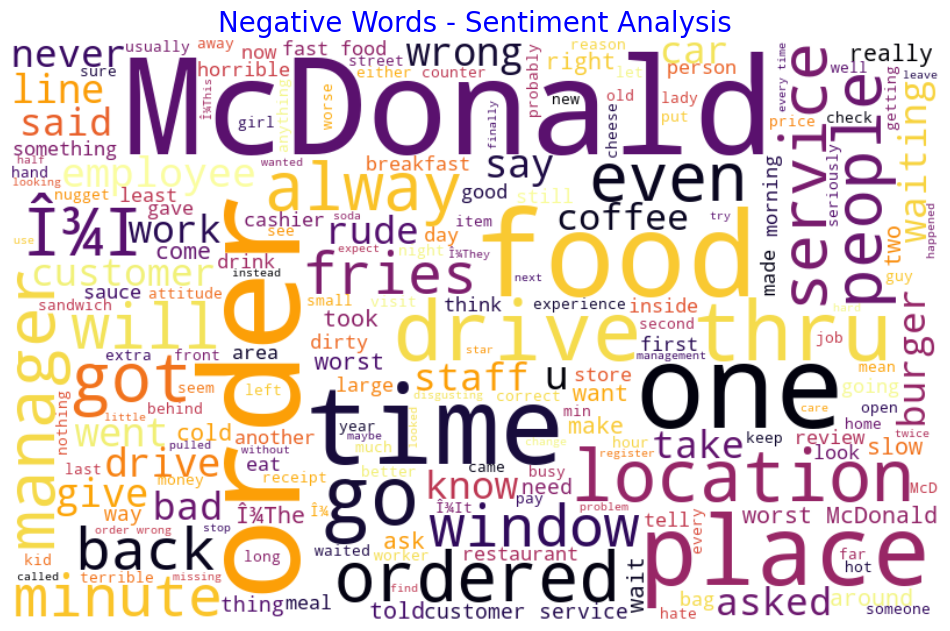

In [20]:
negativewords = ' '.join([review for review in negative_table['review']])
wordcloud = WordCloud(width=800,
    height=500,
    background_color='white',  
    colormap='inferno', 
    random_state=20,
    max_font_size=119).generate(negativewords)


plt.figure(figsize = (12,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.title("Negative Words - Sentiment Analysis", fontsize=20, color='blue')
plt.axis('off')
plt.show()

In [22]:
sentiment= df["Analysis"].value_counts()
sentiment

Negative    637
Positive    499
Neutral      40
Name: Analysis, dtype: int64

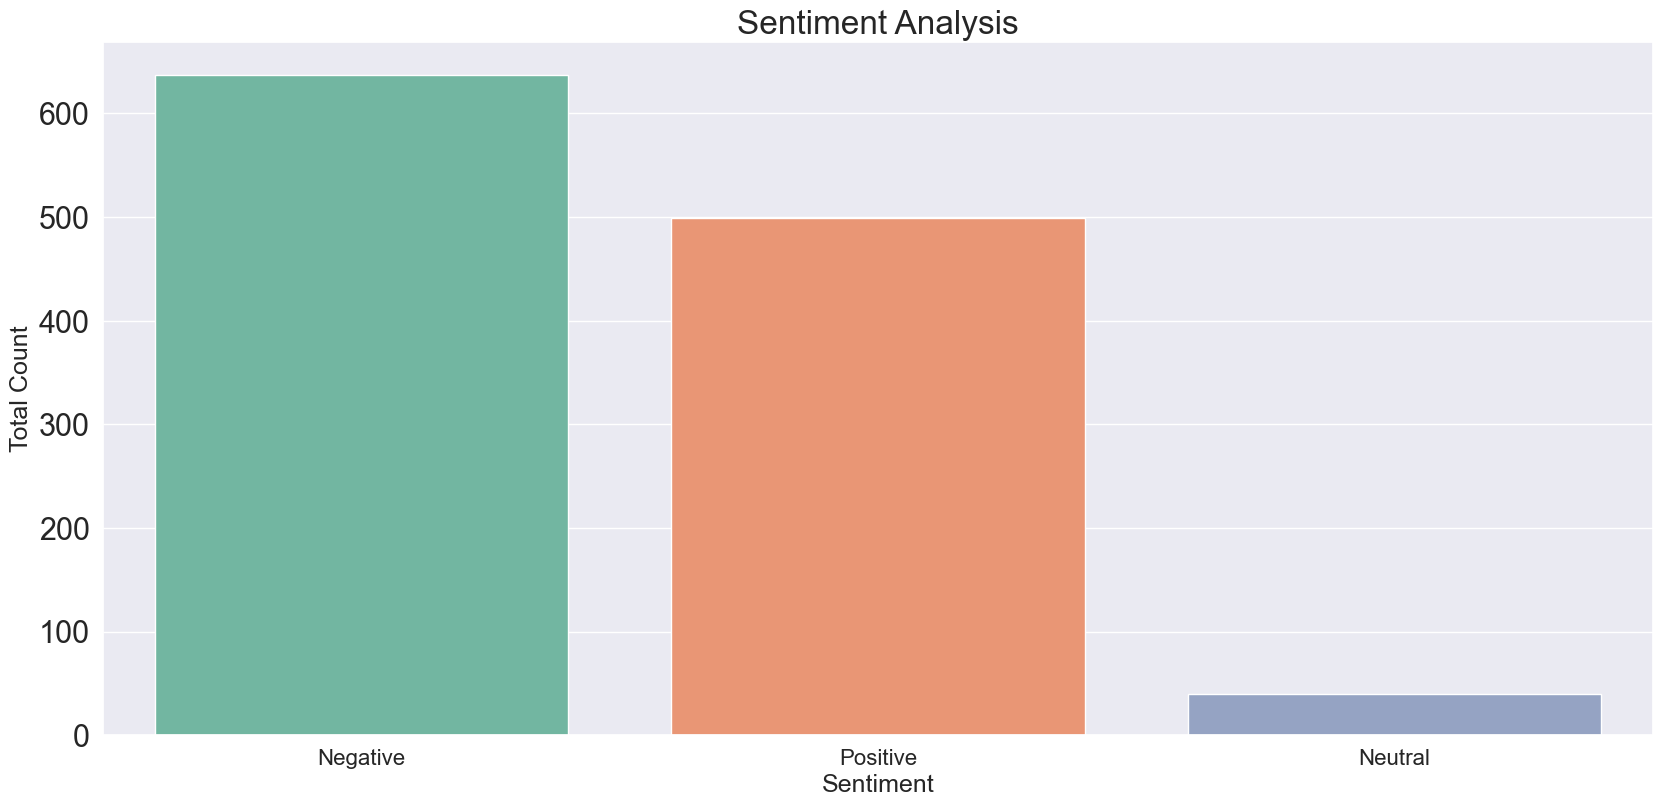

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 9))
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.countplot(x=df["Analysis"])

plt.title("Sentiment Analysis", fontsize=24)
plt.xlabel("Sentiment", fontsize=18)
plt.ylabel("Total Count", fontsize=18)
plt.xticks(fontsize=16)
plt.show()

In [23]:
positive_len = len(df[df["Analysis"] == "Positive"])
negative_len = len(df[df["Analysis"] == "Negative"])
neutral_len = len(df[df["Analysis"] == "Neutral"])

data =[positive_len, negative_len, neutral_len]
keys = ["Positive","Negative","Neutral"]

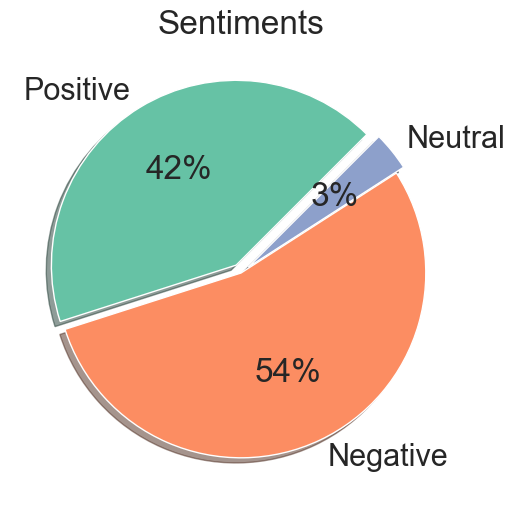

In [24]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=2, style="darkgrid")
color_palette = sns.color_palette("Set2")

plt.pie(x=data, labels=keys, autopct='%0.0f%%', shadow=True, explode=[0.05, 0.0, 0.05], startangle=45, colors=color_palette)
plt.title("Sentiments", fontsize=24)
plt.show()

### Figuring out the most common problems faced by customers that lead to greater negative sentiments

In [25]:
counts = df['policies_violated'].value_counts()
top_20 = counts.head(20)
print(top_20)

RudeService                  177
SlowService                  127
OrderProblem                 116
BadFood                      101
ScaryMcDs                     71
SlowService\rRudeService      56
RudeService\rOrderProblem     53
Filthy                        43
OrderProblem\rRudeService     29
RudeService\rBadFood          27
SlowService\rOrderProblem     26
RudeService\rSlowService      19
MissingFood                   18
Cost                          16
OrderProblem\rSlowService     14
BadFood\rRudeService          13
SlowService\rBadFood          12
OrderProblem\rBadFood         11
RudeService\rFilthy           10
BadFood\rOrderProblem          9
Name: policies_violated, dtype: int64


### Plotting them

) missing from current font.
  plt.tight_layout()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


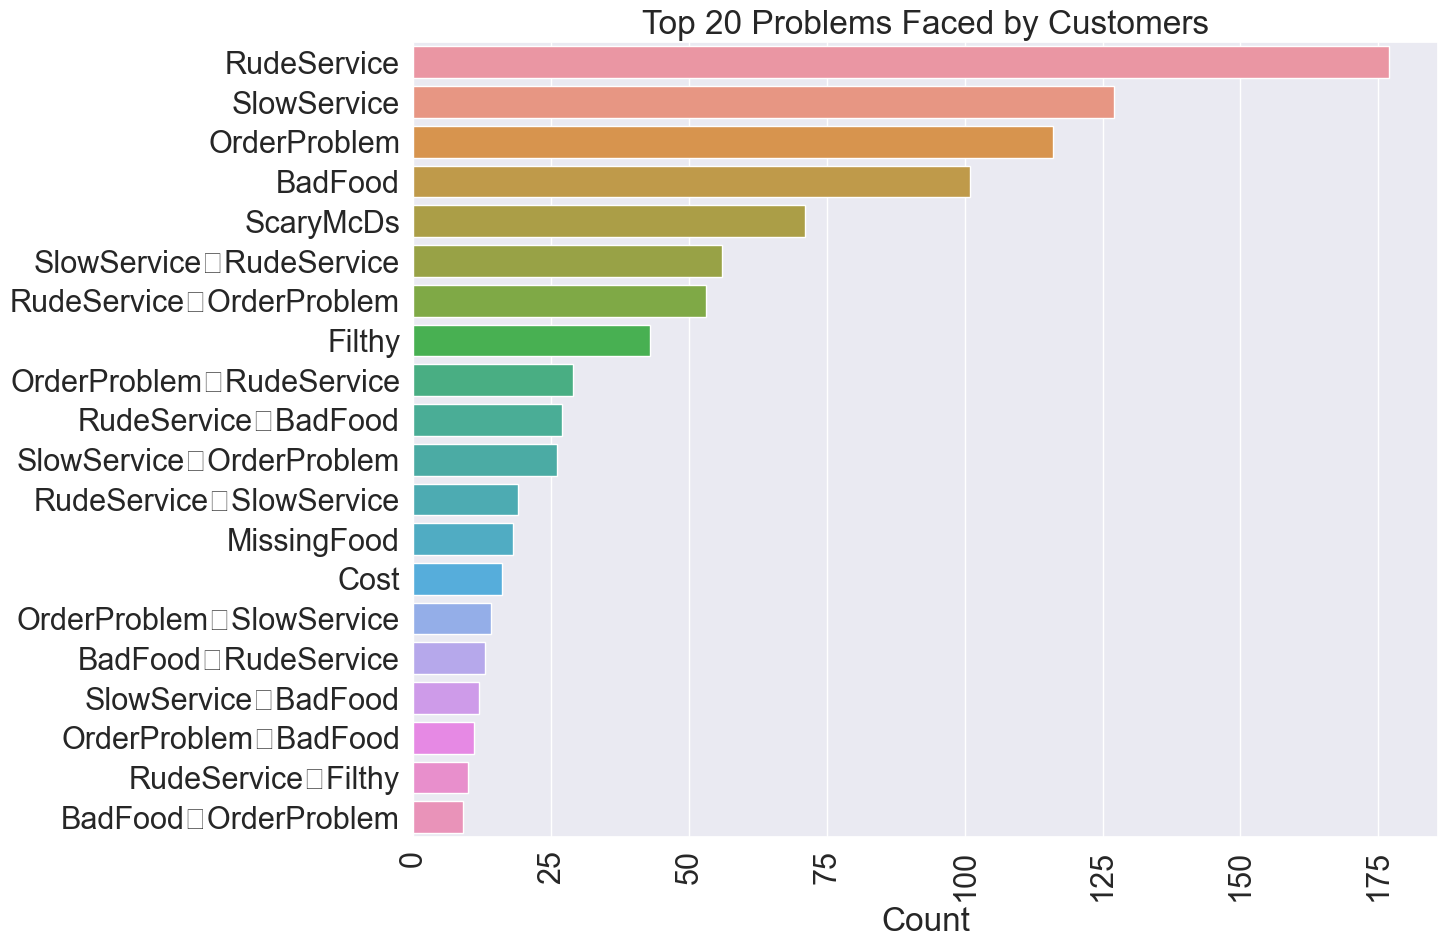

In [28]:
plt.figure(figsize=(15, 10))
sns.barplot(x=top_20, y=top_20.index)
plt.xticks(rotation=90)
plt.xlabel('Count')
plt.title('Top 20 Problems Faced by Customers')
plt.tight_layout()
plt.show()